# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## German Twitter Text (DE)

In [2]:
de = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-DE.json').T
de

,other_tweet_ids,mbti,user_id,confirmed_tweet_ids,gender
26987381,"[408289812979122176, 540981286211690496, 58899...",ISTJ,26987381,"[362245806595637249, 362246274948403201, 36225...",F
50455946,"[353586354480885760, 118128987452092417, 37685...",INFP,50455946,"[106879066111610880, 106887999593263104, 10798...",F
62117549,"[276076139888402432, 128740494732832768, 17270...",ENTP,62117549,"[105854332481703936, 105854724565241856, 10586...",M
267147030,"[664348315383918592, 657637103094902786, 66274...",ENFJ,267147030,"[620564843532320768, 620567387356700672, 62056...",F
1648215529,"[664179678324871168, 651129358241796096, 65645...",INTJ,1648215529,"[646621824818761728, 646626441984114688, 64664...",F
...,...,...,...,...,...
172502214,"[651444364791709697, 648644916499849216, 63874...",INFP,172502214,"[637675994657214466, 637706816567279616, 63770...",M
101072802,"[409760126250135552, 395637489559277568, 29779...",ESFJ,101072802,"[386556380825391104, 393082134979571712, 39309...",F
2250256058,"[597063026207006720, 542334845624795136, 59849...",INTJ,2250256058,"[525191289151975424, 525330294300479488, 52533...",F
56841261,"[589021380974350337, 462648156665434113, 62677...",INTJ,56841261,"[260105951217078272, 260110286269337602, 26012...",M


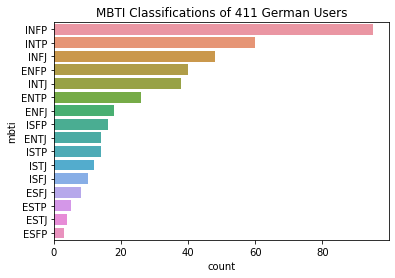

In [3]:
german_author_plot = de.groupby('mbti').count()['other_tweet_ids'].to_frame().reset_index().rename(
    columns={'other_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=german_author_plot).set_title(
    'MBTI Classifications of {} German Users'.format(sum(german_author_plot['count'])));

In [4]:
german_text_mbti = de[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
german_text_mbti.head()

,confirmed_tweet_ids,mbti
26987381,362245806595637249,ISTJ
26987381,362246274948403201,ISTJ
26987381,362255143883907073,ISTJ
26987381,362255545840840705,ISTJ
26987381,362258637768491009,ISTJ


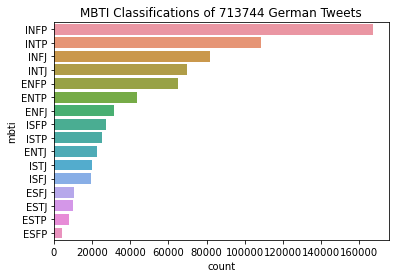

In [5]:
german_twitter_plot = german_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=german_twitter_plot).set_title(
    'MBTI Classifications of {} German Tweets'.format(sum(german_twitter_plot['count'])));

In [34]:
german_output = german_text_mbti.reset_index().rename(columns={'index':'author_id'}) 
german_output['language'] = np.repeat('german', german_output.shape[0])
german_output = german_output[['author_id', 'confirmed_tweet_ids', 'language', 'mbti']]
german_output

,author_id,confirmed_tweet_ids,language,mbti
0,26987381,362245806595637249,german,ISTJ
1,26987381,362246274948403201,german,ISTJ
2,26987381,362255143883907073,german,ISTJ
3,26987381,362255545840840705,german,ISTJ
4,26987381,362258637768491009,german,ISTJ
...,...,...,...,...
713739,62925601,666604461910028288,german,INFP
713740,62925601,666619782851096576,german,INFP
713741,62925601,666664027175723008,german,INFP
713742,62925601,666664055445303297,german,INFP


In [35]:
german_output.to_csv('../NLP_MBTI_Classification/twisty/german_confirmed_tweets.json')

## Spanish Twitter Text (ES)

In [2]:
es = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-ES.json').T
es

,other_tweet_ids,mbti,user_id,confirmed_tweet_ids,gender
54056853,"[566773199212666880, 585051894512545793, 58445...",ENTJ,54056853,"[676146060193079296, 446745936958865408, 57718...",M
2573243225,"[648930148654415872, 664987246764924928, 64612...",INFP,2573243225,"[646509854648049664, 642744838832685057, 64889...",F
399751937,"[631138007282749441, 634229567264301056, 64943...",INTP,399751937,"[672629376589111297, 683482513252155392, 66337...",M
541982091,"[659517076869144576, 664204395563847680, 66485...",INFJ,541982091,"[672139144819249152, 660784321603706880, 67571...",F
70392126,"[483226984043253760, 471686257534595073, 62794...",ISTJ,70392126,"[667361613314437120, 590695776218644485, 49250...",F
...,...,...,...,...,...
165848831,"[150328353260441601, 530779540457791489, 16663...",ENFP,165848831,"[110441331024863232, 405190077535354881, 12593...",F
128377140,"[305742251139661824, 305740357050703872, 30574...",INFJ,128377140,"[311823910645678080, 84439538260393984, 122385...",M
122450877,"[9631407336853504, 24025150416, 24128451353, 5...",ESFJ,122450877,"[132599939426553856, 25242217895436288, 669667...",F
248404858,"[431186916822638593, 456537307504336896, 56778...",ENTJ,248404858,"[470612847370993665, 431954224692215808, 43159...",M


In [3]:
spanish_tweets_mbti = es[['confirmed_tweet_ids', 'mbti']]
spanish_tweets_mbti

,confirmed_tweet_ids,mbti
54056853,"[676146060193079296, 446745936958865408, 57718...",ENTJ
2573243225,"[646509854648049664, 642744838832685057, 64889...",INFP
399751937,"[672629376589111297, 683482513252155392, 66337...",INTP
541982091,"[672139144819249152, 660784321603706880, 67571...",INFJ
70392126,"[667361613314437120, 590695776218644485, 49250...",ISTJ
...,...,...
165848831,"[110441331024863232, 405190077535354881, 12593...",ENFP
128377140,"[311823910645678080, 84439538260393984, 122385...",INFJ
122450877,"[132599939426553856, 25242217895436288, 669667...",ESFJ
248404858,"[470612847370993665, 431954224692215808, 43159...",ENTJ


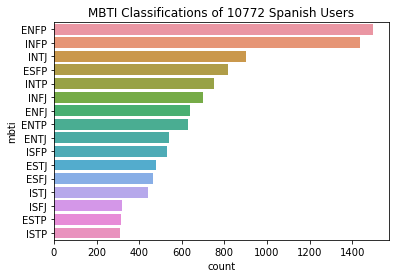

In [5]:
spanish_author_plot = spanish_tweets_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=spanish_author_plot).set_title(
    'MBTI Classifications of {} Spanish Users'.format(sum(spanish_author_plot['count'])));

In [3]:
spanish_text_mbti = es[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
spanish_text_mbti.head()

,confirmed_tweet_ids,mbti
54056853,676146060193079296,ENTJ
54056853,446745936958865408,ENTJ
54056853,577184266926321664,ENTJ
54056853,439432236862287872,ENTJ
54056853,577301822542651392,ENTJ


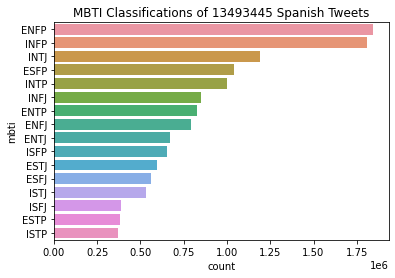

In [7]:
spanish_twitter_plot = spanish_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=spanish_twitter_plot).set_title(
    'MBTI Classifications of {} Spanish Tweets'.format(sum(spanish_twitter_plot['count'])));

In [ ]:
spanish_output = spanish_text_mbti.reset_index().rename(columns={'index':'author_id'}) 
spanish_output['language'] = np.repeat('spanish', spanish_output.shape[0])
spanish_output = spanish_output[['author_id', 'confirmed_tweet_ids', 'language', 'mbti']]
spanish_output

## French Twitter Text (FR)

In [12]:
fr = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-FR.json').T
fr

,other_tweet_ids,mbti,user_id,confirmed_tweet_ids,gender
323822876,"[655545717528862721, 665427014741004288, 65727...",INFJ,323822876,"[666890143312293888, 655160662633676800, 65606...",F
1481872374,"[651779890514132992, 622153733435211776, 66420...",INFP,1481872374,"[669500275347058688, 618780017590452224, 62124...",F
738933,"[579990217874096128, 551449332889571328, 61410...",INTJ,738933,"[642418534874804224, 561536865053204480, 55438...",M
76134327,"[663813886760501249, 667382059187494912, 66023...",INFP,76134327,"[661915177323859968, 663097119239049216, 67132...",F
456529462,"[645200891394527232, 665083740679458816, 67324...",INTJ,456529462,"[638015774356078592, 643829251314159616, 63725...",F
...,...,...,...,...,...
51198406,"[516952962430537728, 512893806447165440, 33056...",INFJ,51198406,"[271229208016080898, 253746630300422144, 25757...",M
188359293,"[670366254029479936, 671510392384921600, 67072...",ESFJ,188359293,"[666045714489843712, 673073026632687616, 67147...",F
1666094737,"[490956427998298112, 443860296822566912, 42534...",ENFP,1666094737,"[488729833661542400, 505350672121094144, 44637...",F
247979997,"[658447113504862208, 657628941281271808, 65550...",INFP,247979997,"[671114671995396097, 666861424405278721, 66794...",M


In [13]:
french_tweets_mbti = fr[['confirmed_tweet_ids', 'mbti']]
french_tweets_mbti

,confirmed_tweet_ids,mbti
323822876,"[666890143312293888, 655160662633676800, 65606...",INFJ
1481872374,"[669500275347058688, 618780017590452224, 62124...",INFP
738933,"[642418534874804224, 561536865053204480, 55438...",INTJ
76134327,"[661915177323859968, 663097119239049216, 67132...",INFP
456529462,"[638015774356078592, 643829251314159616, 63725...",INTJ
...,...,...
51198406,"[271229208016080898, 253746630300422144, 25757...",INFJ
188359293,"[666045714489843712, 673073026632687616, 67147...",ESFJ
1666094737,"[488729833661542400, 505350672121094144, 44637...",ENFP
247979997,"[671114671995396097, 666861424405278721, 66794...",INFP


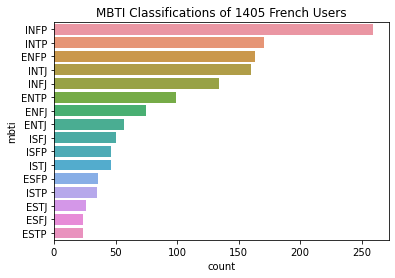

In [14]:
french_author_plot = french_tweets_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=french_author_plot).set_title(
    'MBTI Classifications of {} French Users'.format(sum(french_author_plot['count'])));

In [15]:
french_text_mbti = fr[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
french_text_mbti.head()

,confirmed_tweet_ids,mbti
323822876,666890143312293888,INFJ
323822876,655160662633676800,INFJ
323822876,656069535729065985,INFJ
323822876,657564599470956545,INFJ
323822876,656769622822273025,INFJ


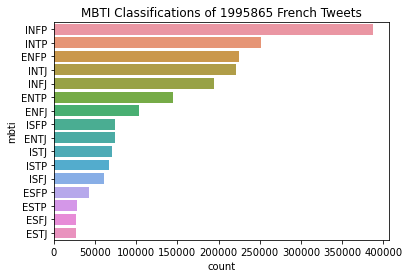

In [16]:
french_twitter_plot = french_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=french_twitter_plot).set_title(
    'MBTI Classifications of {} French Tweets'.format(sum(french_twitter_plot['count'])));

## Italian Twitter Text (IT)

In [17]:
it = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-IT.json').T
it

,other_tweet_ids,mbti,user_id,confirmed_tweet_ids,gender
551190807,"[690874797547491328, 357750265060925440, 45574...",ENFP,551190807,"[406302364510191616, 475189395197140992, 45256...",F
196527314,"[626301724664446977, 682265513117003776, 64966...",INTJ,196527314,"[667704470894170112, 664802814586175488, 68335...",F
1418334055,"[509713079467520000, 528460146889195520, 51002...",INFJ,1418334055,"[498259709649240064, 528207080961114113, 59158...",M
1397157432,"[681067068586852352, 691337746569363458, 69172...",INTJ,1397157432,"[685570091866566657, 691307335214616576, 68593...",F
594972597,"[670178563774160896, 646779629118746624, 66312...",ESTJ,594972597,"[653676692024741888, 663297570559668225, 63319...",M
...,...,...,...,...,...
1562787284,"[487501968399941632, 652822801062207488, 63483...",INFJ,1562787284,"[493161836502851584, 631968210972213248, 58580...",F
240276137,"[495521659709714432, 478150061751545856, 49745...",ISTJ,240276137,"[463686962411745283, 470209447093354496, 47353...",M
186957475,"[667334082179768320, 656558040611692544, 65842...",INFP,186957475,"[674646349841870849, 672690973571457025, 68149...",F
1201405446,"[664843805363974145, 665211983667548160, 63439...",INFP,1201405446,"[628550519431282688, 633365290286514176, 65236...",M


In [18]:
italian_tweets_mbti = it[['confirmed_tweet_ids', 'mbti']]
italian_tweets_mbti

,confirmed_tweet_ids,mbti
551190807,"[406302364510191616, 475189395197140992, 45256...",ENFP
196527314,"[667704470894170112, 664802814586175488, 68335...",INTJ
1418334055,"[498259709649240064, 528207080961114113, 59158...",INFJ
1397157432,"[685570091866566657, 691307335214616576, 68593...",INTJ
594972597,"[653676692024741888, 663297570559668225, 63319...",ESTJ
...,...,...
1562787284,"[493161836502851584, 631968210972213248, 58580...",INFJ
240276137,"[463686962411745283, 470209447093354496, 47353...",ISTJ
186957475,"[674646349841870849, 672690973571457025, 68149...",INFP
1201405446,"[628550519431282688, 633365290286514176, 65236...",INFP


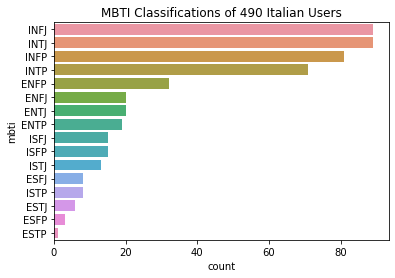

In [19]:
italian_author_plot = italian_tweets_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=italian_author_plot).set_title(
    'MBTI Classifications of {} Italian Users'.format(sum(italian_author_plot['count'])));

In [20]:
italian_text_mbti = it[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
italian_text_mbti.head()

,confirmed_tweet_ids,mbti
551190807,406302364510191616,ENFP
551190807,475189395197140992,ENFP
551190807,452563894876528640,ENFP
551190807,484341384795926528,ENFP
551190807,666010973854146560,ENFP


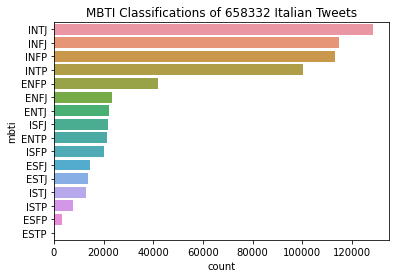

In [21]:
italian_twitter_plot = italian_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=italian_twitter_plot).set_title(
    'MBTI Classifications of {} Italian Tweets'.format(sum(italian_twitter_plot['count'])));

## Dutch Twitter Text (NL)

In [22]:
nl = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-NL.json').T
nl

,other_tweet_ids,mbti,user_id,confirmed_tweet_ids,gender
110533356,"[28829098906222592, 3610233817538560, 22984119...",ESTJ,110533356,"[100203467251007488, 100205011941851136, 10028...",M
19494663,"[121858219139284992, 301959202409172992, 10699...",ENFP,19494663,"[100137338839109632, 100137990541688833, 10016...",F
391303419,"[346283106115911681, 153539573920710656, 18894...",ESTJ,391303419,"[125165716684013568, 125232818002460672, 12531...",F
51474389,"[656167507989045248, 645015463664185344, 64745...",ENFP,51474389,"[644618308667490304, 644618761186709504, 64462...",F
81412656,"[648399130381918208, 654960028223459328, 63905...",ESFP,81412656,"[638093013005279232, 638095935336222720, 63809...",M
...,...,...,...,...,...
380330731,"[585354310415953920, 398008212844064768, 20022...",ENFJ,380330731,"[156307068817653760, 156307308459212800, 16208...",F
484562453,"[176294000800710656, 168982698952638464]",INFP,484562453,"[166427328946257920, 168668767084216320, 16866...",M
391551419,"[435465442019115008, 393367377993150465, 57023...",INFP,391551419,"[300595959803551744, 303902668793970688, 30678...",M
243342274,"[275609859657969664, 268374432907669504, 26867...",ISFJ,243342274,"[102839494977400832, 119701628034088960, 12487...",F


In [23]:
dutch_tweets_mbti = nl[['confirmed_tweet_ids', 'mbti']]
dutch_tweets_mbti

,confirmed_tweet_ids,mbti
110533356,"[100203467251007488, 100205011941851136, 10028...",ESTJ
19494663,"[100137338839109632, 100137990541688833, 10016...",ENFP
391303419,"[125165716684013568, 125232818002460672, 12531...",ESTJ
51474389,"[644618308667490304, 644618761186709504, 64462...",ENFP
81412656,"[638093013005279232, 638095935336222720, 63809...",ESFP
...,...,...
380330731,"[156307068817653760, 156307308459212800, 16208...",ENFJ
484562453,"[166427328946257920, 168668767084216320, 16866...",INFP
391551419,"[300595959803551744, 303902668793970688, 30678...",INFP
243342274,"[102839494977400832, 119701628034088960, 12487...",ISFJ


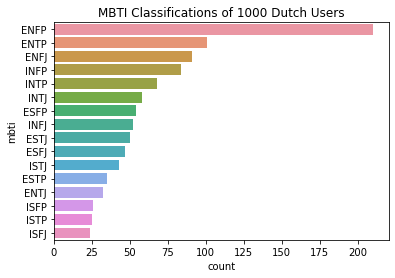

In [24]:
dutch_author_plot = dutch_tweets_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=dutch_author_plot).set_title(
    'MBTI Classifications of {} Dutch Users'.format(sum(dutch_author_plot['count'])));

In [25]:
dutch_text_mbti = it[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
dutch_text_mbti.head()

,confirmed_tweet_ids,mbti
551190807,406302364510191616,ENFP
551190807,475189395197140992,ENFP
551190807,452563894876528640,ENFP
551190807,484341384795926528,ENFP
551190807,666010973854146560,ENFP


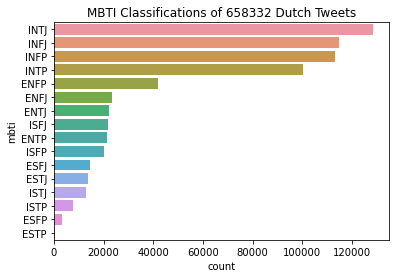

In [26]:
dutch_twitter_plot = dutch_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=dutch_twitter_plot).set_title(
    'MBTI Classifications of {} Dutch Tweets'.format(sum(dutch_twitter_plot['count'])));

## Portuguese Twitter Text (PT)

In [ ]:
pt = pd.read_json('../NLP_MBTI_Classification/twisty/TwiSty-PT.json').T
pt

In [ ]:
portuguese_tweets_mbti = pt[['confirmed_tweet_ids', 'mbti']]
portuguese_tweets_mbti

In [ ]:
portuguese_author_plot = portuguese_tweets_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=portuguese_author_plot).set_title(
    'MBTI Classifications of {} Portuguese Users'.format(sum(portuguese_author_plot['count'])));

In [ ]:
portuguese_text_mbti = it[['confirmed_tweet_ids', 'mbti']].explode('confirmed_tweet_ids')
portuguese_text_mbti.head()

In [ ]:
portuguese_twitter_plot = portuguese_text_mbti.groupby('mbti').count().reset_index().rename(
    columns={'confirmed_tweet_ids':'count'}).sort_values(by=['count'], ascending=False)

sns.barplot(x="count", y="mbti", data=portuguese_twitter_plot).set_title(
    'MBTI Classifications of {} Portuguese Tweets'.format(sum(portuguese_twitter_plot['count'])));

## Summary of Twisty Corpus

In [ ]:
german_author_plot['language'] = np.repeat('german', german_author_plot.shape[0])
spanish_author_plot['language'] = np.repeat('spanish', spanish_author_plot.shape[0])
french_author_plot['language'] = np.repeat('french', french_author_plot.shape[0])
italian_author_plot['language'] = np.repeat('italian', italian_author_plot.shape[0])
dutch_author_plot['language'] = np.repeat('dutch', dutch_author_plot.shape[0])
portuguese_author_plot['language'] = np.repeat('portuguese', portuguese_author_plot.shape[0])

In [ ]:
# Get first twitter id from each confirmed
first_confirmed = de['confirmed_tweet_ids'].apply(lambda x: x[0])
first_confirmed

In [ ]:
export = de[['mbti']]
export['twitter_ids'] = first_confirmed
export = export.reset_index().rename(columns = {'index':'twitter_user_id'})
export

In [ ]:
export.to_csv('../NLP_MBTI_Classification/DE-trial.csv')

In [ ]:
de['confirmed_tweet_ids'].iloc[0]